# **Investigating Predictors of Heart Disease**
done by Group 10 - Arnav, Drishti, Karan and Samia 

### Introduction:

Heart disease is a leading cause of mortality worldwide, making it a significant public health concern.
Understanding the factors associated with heart disease occurrence is crucial for prevention and intervention efforts. In our project, we aim to explore the predictors of heart disease using a dataset containing various patient attributes and heart disease diagnosis outcomes (Kreatsoulas, C., & Anand, S. S., 2010).

The central question guiding our analysis is: *Can factors like age, cholosteral levels, and heart rate be used to predict if a patient has heart disease?*

### Dataset Description:
We will utilize the "Heart Disease" dataset, which includes patient demographic information, clinical attributes, and a binary target variable indicating the presence or absence of heart disease. 
The dataset is sourced from a reliable repository and has been widely used for cardiovascular research.
The dataset comprises 76 attributes, with most studies centered on a subset of 14 attributes. Primarily sourced from the Cleveland database, extensively utilized by machine learning (ML) researchers, it aims to predict the presence of heart disease. The "goal" field denotes heart disease presence, ranging from 0 (absence) to 4.  
(Janosi, Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert, 1988)

The relevant columns in this spreadsheet are: 
1. **age**: age
2. **sex**: sex (1 = male, 0 = female)
3. **cp**: chest pain type
4. **trestbps**: resting blood pressure in mmHg
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: fasting blood sugar > 120 mg/dl? (1 = True, 0 = False)
7. **restecg**: resting electrocardiographic results
8. **thalach**: maximum heart rate achieved
9. **exang**: whether exercise induced angina (1 = True, 0 = False)
10. **oldpeak**: ST depression induced by exercise, relative to rest
11. **slope**: the slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. **num**: diagnosis of heart disease (1,2,3,4 = presence, 0 = no presence)

### Methods

#### Our Approach for Analysis: 
#### Preliminary Exploratory Data Analysis:

- ##### Loading the dataset and libraries: 
  We will programmatically access and use the URL of the "Heart Disease" dataset into our Jupyter Notebook to ensure reproducibility. Ensuring we have the information we need for our analysis right from the start.

- ##### Cleaning and Wrangling the data:
  After having loaded the data into Jupyter, steps to tidy the data will be taken. Data cleaning and wrangling steps will be perfromed including handling missing values and encoding categorical variables as necessary.

- ##### Splitting our data into training and testing sets
  Split the data into training and testing sets. Utilizing only the training data to build the model and using the   testing data only to evaluate the performance of the model

- ##### Summarizing the training data 
  Summary statistics will be calculated to understand the distribution of variables and identify potential trends.

- ##### Visualizing the results
  Visualizations, such as scatterplots, will be generated to explore relationships between variables and gain insights into the data.

#### Setting up the environment : Loading the dataset and libraries

In [2]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

# formatting 
options(repr.plot.width = 6, repr.plot.height = 6)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [3]:
#reading the data
url<-"https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

heart_data <-read_csv(url, col_names=FALSE) |>
                rename(age=X1,
                       sex=X2,
                       cp=X3,
                       trestbps=X4,
                       chol=X5,
                       fbs=X6,
                       restecg=X7,
                       thalach=X8,
                       exang=X9,
                       oldpeak=X10,
                       slope=X11,
                       ca=X12,
                       thal=X13,
                       num=X14)

print("                                TABLE 1:  HEART DISEASE DATA SET                   ")
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "                                TABLE 1:  HEART DISEASE DATA SET                   "


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


#### Tidying the data : Cleaning and Wrangling the data
- In the dataset description, several variables including 'sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'ca', and 'slope' are identified as categorical. Utilizing the mutate function in combination with as.factor(), these variables are converted into categorical types.
- 
Cleaning of the data involves converting missing values denoted as "?" to NA. Moreover, the variable "sex" containing values 0 and 1 is transformed into "male" and "female" respectively for enhanced readability
- 
For a clearer interpretation of the variable "num", its description indicates that values 1 through 4 denote the presence of heart disease, while 0 signifies absence. To facilitate analysis, a new variable is created using the ifelse() function to discern the presence or absence of heart disease based on the values of the "num" variable. 

In [4]:
#categorical variables
heart_newdata <- heart_data |>
                    mutate(sex = as.factor(sex), cp = as.factor(cp), 
                           fbs = as.factor(fbs), restecg = as.factor(restecg),
                           exang = as.factor(exang), thal = as.factor(thal),
                           ca = as.factor(ca), slope = as.factor(slope))
#missing values
heart_newdata[ heart_newdata == "?" ] <- NA

heart_newdata <- heart_newdata|> 
                mutate(heart_disease_status = ifelse(num == 0, 'ABSENT', 'PRESENT'))|>
                mutate(sex = ifelse(sex == 1, 'male', 'female')) 

print("                          TABLE 2 :    HEART DISEASE TIDY DATA                     ")
heart_newdata

[1] "                          TABLE 2 :    HEART DISEASE TIDY DATA                     "


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease_status
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<chr>
63,male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,ABSENT
67,male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,PRESENT
67,male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,PRESENT
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,PRESENT
57,female,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,PRESENT
38,male,3,138,175,0,0,173,0,0.0,1,NA,3.0,0,ABSENT


#### Splitting our data into training and testing sets

Before we start building our model, we need to split our data into two parts: one for training and the other for testing We will use the training data to train our classifer and testing data to evaluate the performance of the model.  We want to predict a new column called`heart_disease_status`g, so we'll split the data in a way that ensures there's a good mix of `heart_disease_status`  values in both sets   .

We'll use a method called`initial_split`t to do this. It divides our data so that 75% is used for training and 25% for testnngThis split helps us train our model with lots of data while still having enough left over to check how well it works. In this case we have 228 rows for training and 75 rows for testing..Using `initial_split` also allows us to shuffle the data before splitting (removing bias and order) so that an equal proportion of each is in each set.s.

In [5]:
#splitting the dataframe into training and testing data
heart_split <- initial_split(heart_newdata, prop = 3/4, strata = num)

heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

print("                                 TABLE 3:    TRAINING DATA                     ")
head(heart_training)
print("                                 TABLE 4:    TESTING DATA                     ")
head(heart_testing)

[1] "                                 TABLE 3:    TRAINING DATA                     "


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease_status
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<chr>
63,male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,ABSENT
41,female,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,ABSENT
56,female,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0,ABSENT
57,male,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0,ABSENT
49,male,2,130,266,0,0,171,0,0.6,1,0.0,3.0,0,ABSENT
64,male,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0,ABSENT


[1] "                                 TABLE 4:    TESTING DATA                     "


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease_status
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<chr>
37,male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,ABSENT
56,male,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,ABSENT
57,female,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,ABSENT
57,male,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0,ABSENT
56,male,3,130,256,1,2,142,1,0.6,2,1.0,6.0,2,PRESENT
44,male,2,120,263,0,0,173,0,0.0,1,0.0,7.0,0,ABSENT


#### Summarizing the training data 
Now we can summarize the data, to see the average values of variables (non-factor) like chol (serum cholestoral in mg/dl), trestbps (resting blood pressure in mmHg) and thalach (maximum heart rate achieved) (predictor variables) and find the total number of patients. This is done by `group_by` and `summarize` to find the average of the cholesterol and maximum heart rate of patients.

In [6]:
heart_summarized <- heart_training |>
                    group_by(heart_disease_status) |>
                    summarize(no_of_patients = n(), avg_chol = mean(chol),
                              avg_thalach = mean(thalach), avg_trestbps = mean(trestbps))

print("              TABLE 5:      SUMMARIZED DATA                      ")
heart_summarized 

[1] "              TABLE 5:      SUMMARIZED DATA                      "


heart_disease_status,no_of_patients,avg_chol,avg_thalach,avg_trestbps
<chr>,<int>,<dbl>,<dbl>,<dbl>
ABSENT,124,244.2903,158.9194,129.7339
PRESENT,102,249.3627,138.4118,133.9020


From the data above, we can see that patients with higher cholesterol and lower maximum heart rate and higher resting blood pressure have heart disease compared to the people who don't have the disease.

#### Visualizing the realtionship between predictors
To visualize the relationship that cholesterol, maximum heart rate and resting blood pressure achieved have with a patient's diagnosis, we will use `ggplot` to generate a scatter plot of thalach chol and trestbps against eacho other with colouring for `heart_disease_status`. 

[1] "                        FIGURE 1                     "


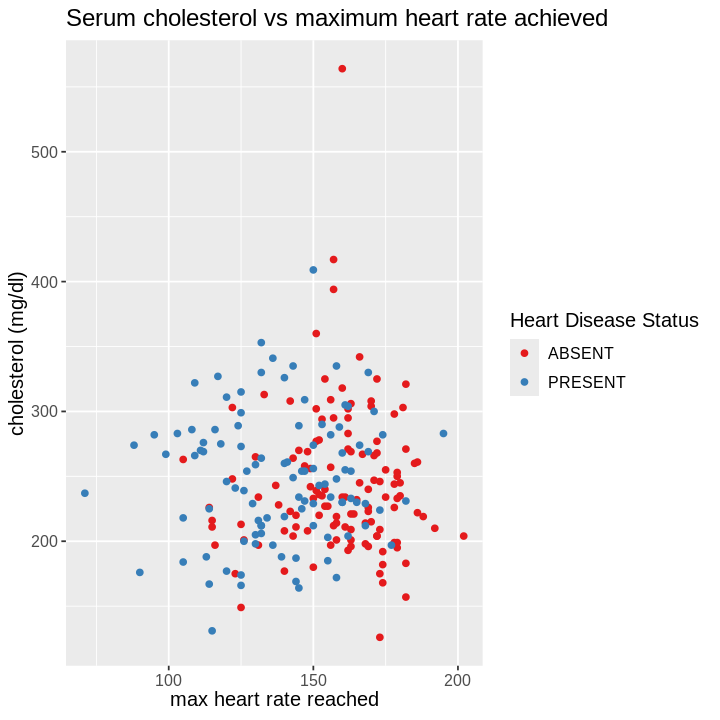

In [7]:
#plotting the training data
heart_dataplot1 <- ggplot(heart_training, aes(x = thalach, y = chol, color = heart_disease_status)) +
                 geom_point() +
                 labs(x = "max heart rate reached", y = "cholesterol (mg/dl)",
                      color = "Heart Disease Status", title = "Serum cholesterol vs maximum heart rate achieved") +
                 scale_color_brewer(palette = "Set1") +
                 theme(text = element_text(size = 12))

print ("                        FIGURE 1                     ")
heart_dataplot1

FIGURE 1 -
This chart indicates that individuals with heart disease (blue) typically exhibit lower maximum heart rates and higher cholesterol levels, while those without heart disease (red) tend to have higher maximum heart rates and a broader range of cholesterol levels.

[1] "                                 FIGURE 2                     "


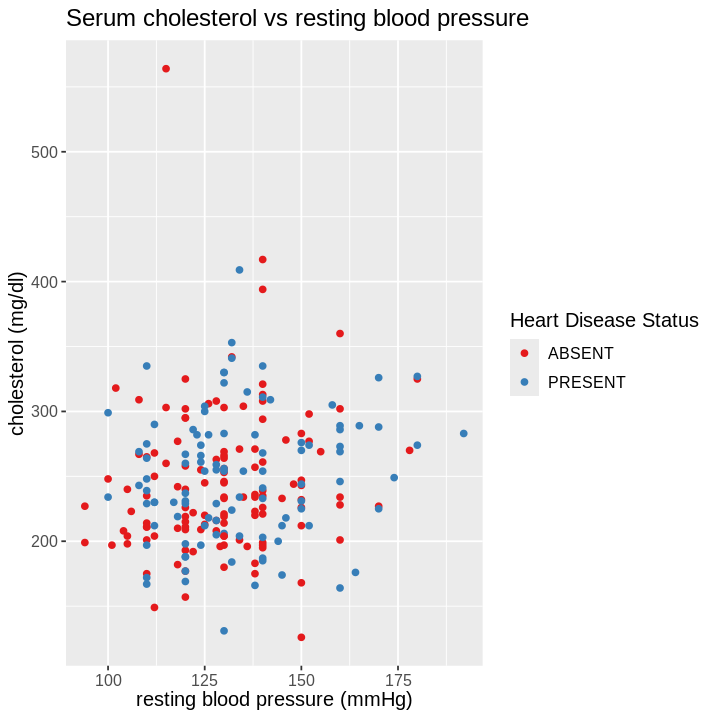

In [8]:
#plotting the training data
heart_dataplot2 <- ggplot(heart_training, aes(x = trestbps, y = chol, color = heart_disease_status)) +
                 geom_point() +
                 labs(x = "resting blood pressure (mmHg)", y = "cholesterol (mg/dl)",
                      color = "Heart Disease Status", title = "Serum cholesterol vs resting blood pressure") +
                 scale_color_brewer(palette = "Set1") +
                 theme(text = element_text(size = 12))
print ("                                 FIGURE 2                     ")
heart_dataplot2

FIGURE 2 - 
Similary, This chart indicates that individuals with heart disease (blue) typically exhibit higher resting blood pressure and higher cholesterol levels, while those without heart disease (red) tend to have lower resting blood pressure and lower cholesterol levels.

[1] "                        FIGURE 3                     "


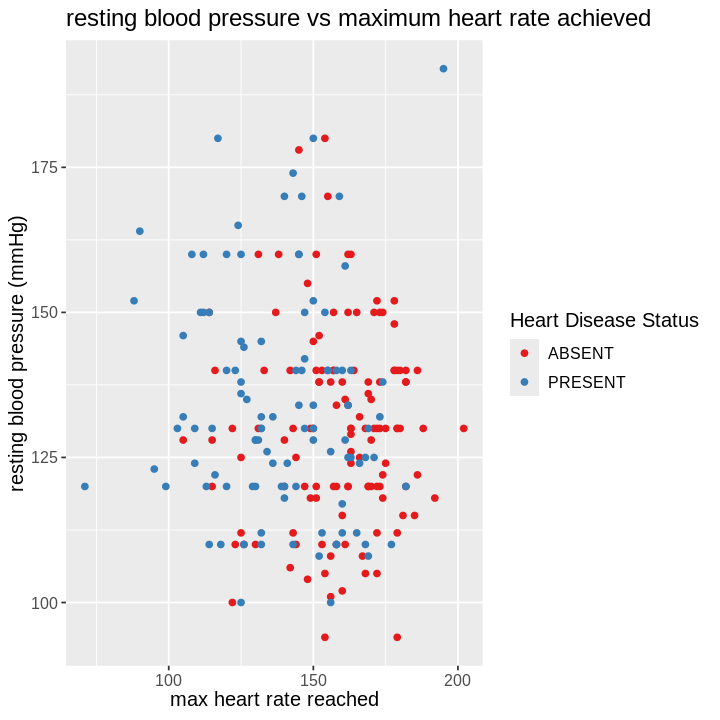

In [9]:
#plotting the training data
heart_dataplot3 <- ggplot(heart_training, aes(x = thalach, y = trestbps, color = heart_disease_status)) +
                 geom_point() +
                 labs(x = "max heart rate reached", y = "resting blood pressure (mmHg)",
                      color = "Heart Disease Status" , title = "resting blood pressure vs maximum heart rate achieved") +
                 scale_color_brewer(palette = "Set1") +
                 theme(text = element_text(size = 12))
print ("                        FIGURE 3                     ")
heart_dataplot3

FIGURE 3- 
Similary, This chart indicates that individuals with heart disease (blue) typically exhibit lower maximum heart rates and higher resting blood pressure levels, while those without heart disease (red) tend to have higher maximum heart rates and a broader range of resting blood pressure.

Viewing the data in this manner enables us to not only confirm the findings of the previous summarized data (TABLE 5) but also observe the impact of outliers on the values it presented. Moreover, it provides insight into the dispersion of the different classes.

### Tuning the Model: Finding the best $k$ value

#### Creating the model
- **Create a Recipe** : create a recipe that uses `heart_training` to predict `heart_disease_status`, with `chol` and `thalach` as predictors.
- **Perform Cross-Validation** : create a specification that uses k-nearest neighbors, with `neighbors = tune()` to perform cross-validation. Split the data into 10 equally sized chunks, known as folds, stratifying by `heart_disease_status`.
- **Create a Workflow** : create a workflow combining the first 2 steps, with `tune_grid` instead of `fit`.
- Repeat for each validation set for values of in [1,100].

Warning message:
“tune samples were requested but there were 226 rows in the data. 221 will be used.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.5600132,10,0.02047137,Preprocessor1_Model01
2,roc_auc,binary,0.6000146,10,0.01808218,Preprocessor1_Model01
3,accuracy,binary,0.5838274,10,0.02782462,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
99,roc_auc,binary,0.7411917,10,0.01983698,Preprocessor1_Model98
100,accuracy,binary,0.6546443,10,0.01818887,Preprocessor1_Model99
100,roc_auc,binary,0.7422640,10,0.02082616,Preprocessor1_Model99


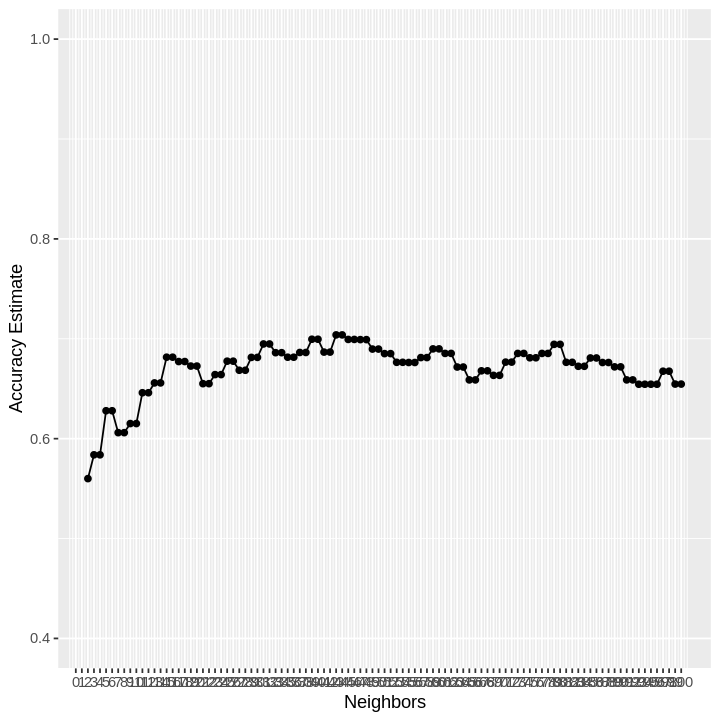

In [31]:
knn_recipe <- recipe(heart_disease_status ~ chol + trestbps + thalach, data = heart_training) 
knn_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")
knn_fit <- workflow() |>
      add_recipe(knn_recipe) |>
      add_model(knn_spec) |>
      fit(data = heart_training)

#Perform a 5-fold cross-validation on the training set
knn_vfold <- vfold_cv(heart_training, v = 10, strata = heart_disease_status)

#a workflow analysis with your recipe and model specification
values <- tibble(neighbors = seq(2, 100)) 
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
            set_engine("kknn") |>
            set_mode("classification")
knn_results <- workflow() |>
      add_recipe(knn_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = knn_vfold, grid = values) |>
      collect_metrics() #Collect the metrics from the workflow analysis
knn_results

#Plot the vs the accuracy
accuracies <- knn_results |> 
      filter(.metric == "accuracy")
cross_val_plot<- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
cross_val_plot

In [33]:
mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 47) |>
              set_engine("kknn") |>
              set_mode("classification")

mnist_fit <- workflow() |>
             add_recipe(knn_recipe) |>
             add_model(mnist_spec) |>
             fit(data = heart_training)

In [12]:
#To get the same folds each time, we need to set the seed to 1.
set.seed(1)

#Creating the Recipe
heartdata_recipe <- recipe(heart_disease_status ~ chol + trestbps + thalach, data = heart_training) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

#Model Specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

#Perfoming Cross Validation over 10 folds
heartdata_vfold <- vfold_cv(heart_training, v = 10, strata = heart_disease_status)

gridvals <- tibble(neighbors = seq(1, 100)) 

#Creating Workflow and Collect the metrics from the workflow analysis
knn_results <- workflow() |>
      add_recipe(heartdata_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = heartdata_vfold, grid = gridvals) |>
      collect_metrics()|>  
      filter(.metric == "accuracy") |>
      select(neighbors, mean) |>
      arrange(desc(mean))

print("           TABLE 6 : ACCURACY           ")
knn_results

neighbors,mean
<int>,<dbl>
47,0.7169466
48,0.7169466
43,0.7167490
⋮,⋮
10,0.6237813
1,0.6186594
2,0.6186594


[1] "           TABLE 6 : ACCURACY           "


From the above table, it can be seen we get a $71%$ accuracy when we assign k as 47 or 48.

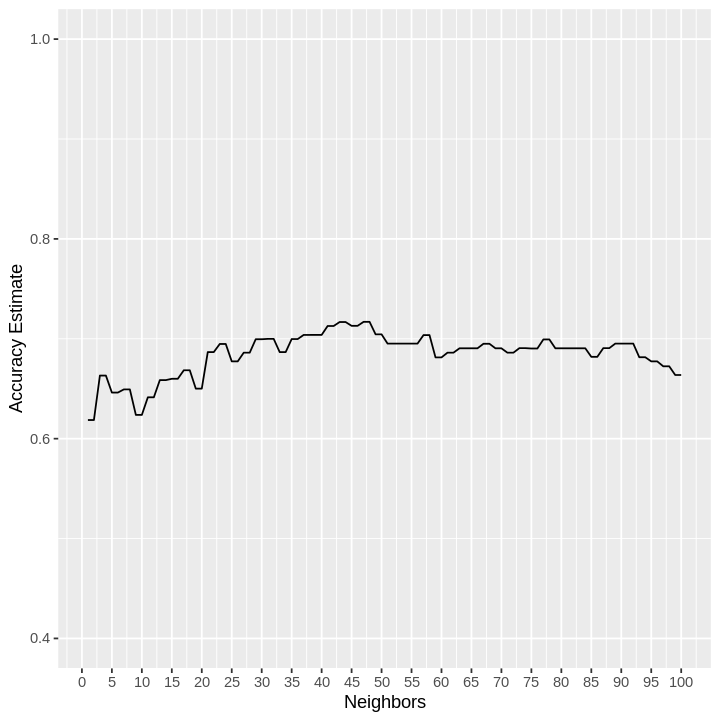

In [17]:
# accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
#       #geom_point() +
#       geom_line() +
#       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracies for 1 ≤ k ≤ 100") +
#       scale_x_continuous(breaks = seq(0, 100, by = 5)) + # adjusting the x-axis
#       theme(text = element_text(size = 15))

# accuracy_versus_k

cross_val_plot<- ggplot(knn_results, aes(x = neighbors, y = mean))+
      #geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
cross_val_plot